In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/stock-market-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/symbols_valid_meta.csv
/kaggle/input/stock-market-dataset/stocks/MTL.csv
/kaggle/input/stock-market-dataset/stocks/JOE.csv
/kaggle/input/stock-market-dataset/stocks/DRE.csv
/kaggle/input/stock-market-dataset/stocks/CTY.csv
/kaggle/input/stock-market-dataset/stocks/AMSF.csv
/kaggle/input/stock-market-dataset/stocks/IMH.csv
/kaggle/input/stock-market-dataset/stocks/GFL.csv
/kaggle/input/stock-market-dataset/stocks/CLM.csv
/kaggle/input/stock-market-dataset/stocks/UBER.csv
/kaggle/input/stock-market-dataset/stocks/NEBU.csv
/kaggle/input/stock-market-dataset/stocks/SGB.csv
/kaggle/input/stock-market-dataset/stocks/WWW.csv
/kaggle/input/stock-market-dataset/stocks/UTSI.csv
/kaggle/input/stock-market-dataset/stocks/PBB.csv
/kaggle/input/stock-market-dataset/stocks/UFCS.csv
/kaggle/input/stock-market-dataset/stocks/ZM.csv
/kaggle/input/stock-market-dataset/stocks/DCPH.csv
/kaggle/input/stock-market-dataset/stocks/HALL.csv
/kaggle/input/stock-market-dataset/s

## Step-1:Data loading and cleaning

In [2]:
df = pd.read_csv('/kaggle/input/stock-market-dataset/etfs/PSMB.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-27,12.61,12.61,12.61,12.61,11.250191,0
1,2017-02-28,12.61,12.61,12.61,12.61,11.250191,100
2,2017-03-01,12.61,12.61,12.61,12.61,11.250191,100
3,2017-03-02,12.61,12.61,12.61,12.61,11.250191,100
4,2017-03-03,12.51,12.52,12.51,12.52,11.169895,1000


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       780 non-null    object 
 1   Open       780 non-null    float64
 2   High       780 non-null    float64
 3   Low        780 non-null    float64
 4   Close      780 non-null    float64
 5   Adj Close  780 non-null    float64
 6   Volume     780 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.8+ KB


## Step-2:Data Exploration

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

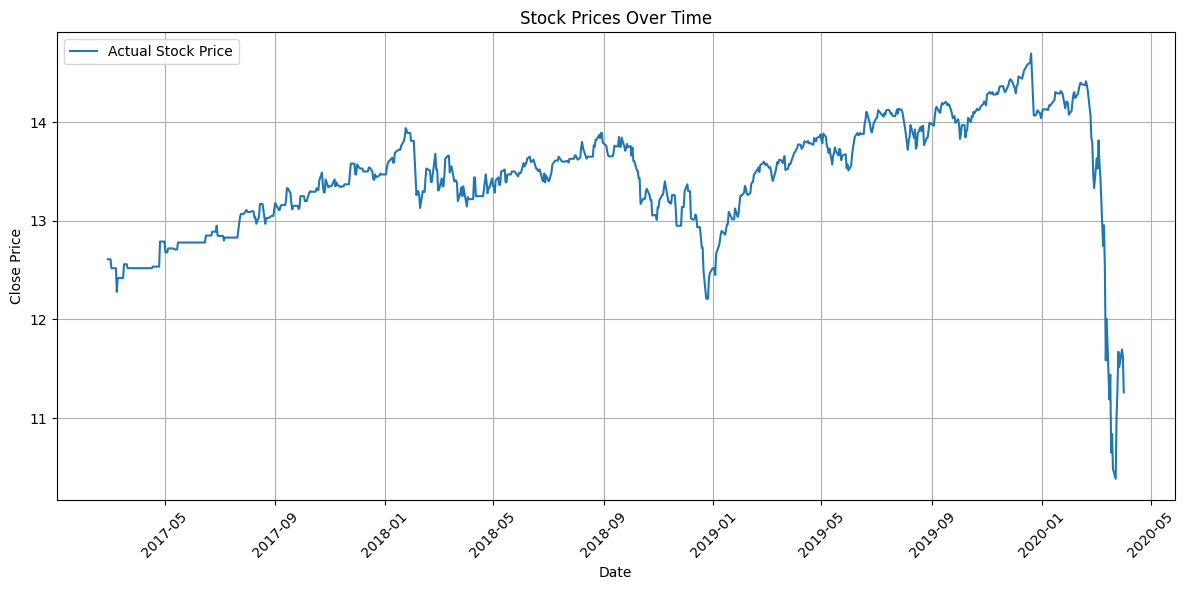

In [7]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# Plot the actual 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Stock Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step-3:Data Preprocessing

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Feature extraction from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear
df['ElapsedDays'] = (df['Date'] - df['Date'].min()).dt.days

# Cyclic encoding for Month and DayOfWeek
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

# Drop the original 'Date' column
df.drop(columns=['Date'], inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,DayOfYear,ElapsedDays,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos
0,12.61,12.61,12.61,12.61,11.250191,0,2017,2,27,0,58,0,0.866025,5.000000e-01,0.000000,1.000000
1,12.61,12.61,12.61,12.61,11.250191,100,2017,2,28,1,59,1,0.866025,5.000000e-01,0.781831,0.623490
2,12.61,12.61,12.61,12.61,11.250191,100,2017,3,1,2,60,2,1.000000,6.123234e-17,0.974928,-0.222521
3,12.61,12.61,12.61,12.61,11.250191,100,2017,3,2,3,61,3,1.000000,6.123234e-17,0.433884,-0.900969
4,12.51,12.52,12.51,12.52,11.169895,1000,2017,3,3,4,62,4,1.000000,6.123234e-17,-0.433884,-0.900969


In [10]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,DayOfWeek,DayOfYear,ElapsedDays,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos
Open,1.000000,0.995683,0.996029,0.994734,0.899785,0.053339,0.444970,0.190633,-0.030145,0.011307,0.188891,0.525305,-0.272867,0.149901,-0.007156,-0.006569
High,0.995683,1.000000,0.992101,0.994360,0.913420,0.057586,0.472038,0.184837,-0.029945,0.008371,0.183184,0.551761,-0.266310,0.155586,-0.005733,-0.002897
Low,0.996029,0.992101,1.000000,0.998620,0.887390,0.048387,0.415703,0.197315,-0.029350,0.015920,0.195558,0.496858,-0.281118,0.142504,-0.006611,-0.011935
Close,0.994734,0.994360,0.998620,1.000000,0.898798,0.054222,0.436165,0.192436,-0.029934,0.015288,0.190687,0.516680,-0.276340,0.147095,-0.007008,-0.010663
Adj Close,0.899785,0.913420,0.887390,0.898798,1.000000,0.066103,0.761973,0.058684,-0.008557,0.009523,0.059757,0.815220,-0.121284,0.229454,-0.006483,-0.005376
Volume,0.053339,0.057586,0.048387,0.054222,0.066103,1.000000,0.064372,0.031641,0.002813,-0.005301,0.031898,0.077456,-0.069943,-0.014585,0.024780,0.003978
Year,0.444970,0.472038,0.415703,0.436165,0.761973,0.064372,1.000000,-0.292047,-0.009806,0.004109,-0.290139,0.952032,0.229950,0.163628,0.001776,-0.003158
Month,0.190633,0.184837,0.197315,0.192436,0.058684,0.031641,-0.292047,1.000000,-0.001097,-0.012865,0.996459,0.013488,-0.775363,0.200896,-0.024101,0.017133
Day,-0.030145,-0.029945,-0.029350,-0.029934,-0.008557,0.002813,-0.009806,-0.001097,1.000000,0.000230,0.082738,0.016210,-0.020739,0.001032,0.015374,-0.000988
DayOfWeek,0.011307,0.008371,0.015920,0.015288,0.009523,-0.005301,0.004109,-0.012865,0.000230,1.000000,-0.012693,0.000235,0.001794,0.009584,-0.353217,-0.966923


### Train-test split

In [11]:
from sklearn.preprocessing import StandardScaler

# Define predictors and target
# Including the new date-related features and original predictors
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month_sin', 'Month_cos', 
        'DayOfWeek_sin', 'DayOfWeek_cos', 'ElapsedDays']]
y = df['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step-4:Model Training

In [12]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Apply Lasso regression
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# Results
print("Mean Squared Error:", mse)
print("Lasso Coefficients:", lasso.coef_)

# Optional: Display feature importance
features = X.columns
for feature, coef in zip(features, lasso.coef_):
    print(f"{feature}: {coef}")

Mean Squared Error: 0.01133386173093336
Lasso Coefficients: [ 0.          0.07296956  0.40428357  0.          0.         -0.
  0.         -0.         -0.          0.        ]
Open: 0.0
High: 0.07296955942065178
Low: 0.404283573265484
Volume: 0.0
Year: 0.0
Month_sin: -0.0
Month_cos: 0.0
DayOfWeek_sin: -0.0
DayOfWeek_cos: -0.0
ElapsedDays: 0.0


In [13]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9720796395626792

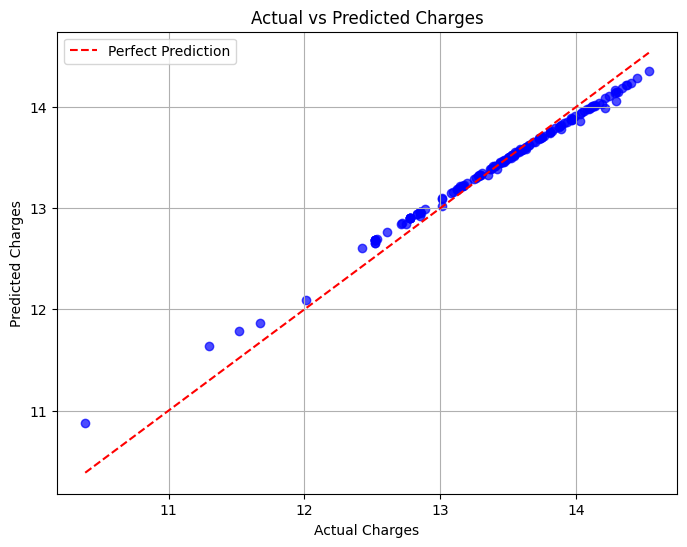

In [14]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid(True)
plt.show()

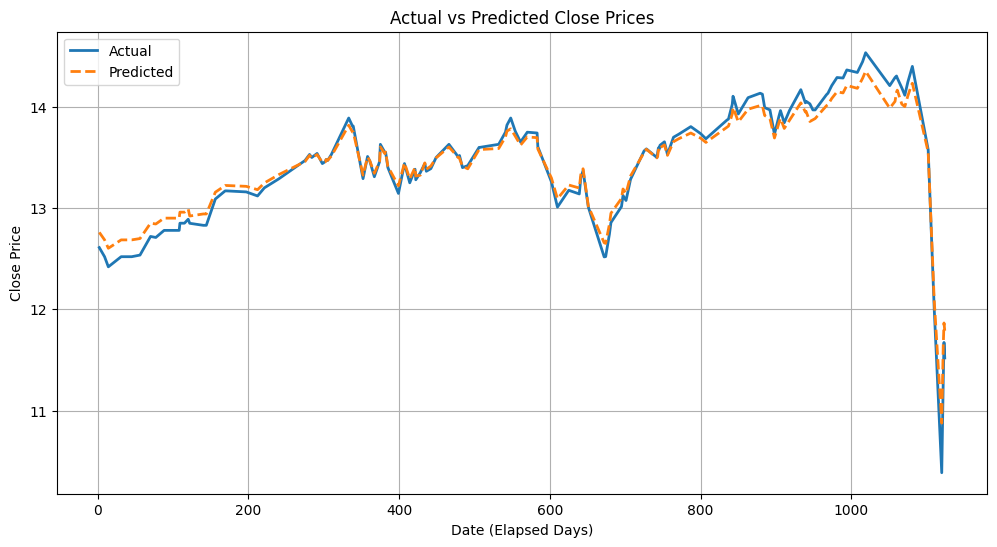

In [15]:
import matplotlib.pyplot as plt

# To use Date for plotting, retrieve it from the original dataset corresponding to the test indices
test_indices = X_test.index
dates_for_test = df.loc[test_indices, 'ElapsedDays']  # Using ElapsedDays as a proxy for Date

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Date': dates_for_test,
    'Actual': y_test.values,
    'Predicted': y_pred
}).sort_values(by='Date')  # Sort by Date for proper plotting

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', linewidth=2)
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date (Elapsed Days)')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
lasso.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## Step-5: Cross Validation

In [17]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=10)

lasso_cv.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_cv = lasso_cv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# Results
print("Mean Squared Error:", mse)
print("Lasso Coefficients:", lasso_cv.coef_)

# Optional: Display feature importance
features = X.columns
for feature, coef in zip(features, lasso_cv.coef_):
    print(f"{feature}: {coef}")

from sklearn.metrics import r2_score
score_cv = r2_score(y_test,y_pred)
score_cv

Mean Squared Error: 0.01133386173093336
Lasso Coefficients: [-0.          0.10734846  0.46723282  0.0013255   0.00266461 -0.
  0.         -0.         -0.          0.00145336]
Open: -0.0
High: 0.10734846499226891
Low: 0.4672328183478333
Volume: 0.0013255006215025982
Year: 0.002664613897218905
Month_sin: -0.0
Month_cos: 0.0
DayOfWeek_sin: -0.0
DayOfWeek_cos: -0.0
ElapsedDays: 0.0014533551684650598


0.9720796395626792

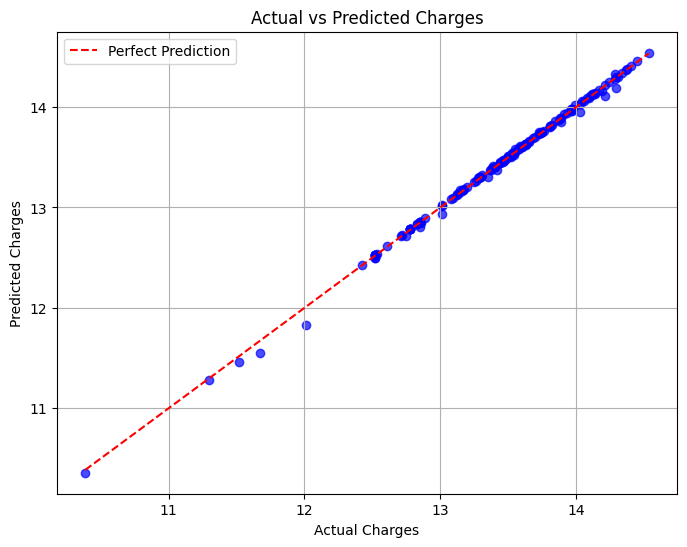

In [18]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cv, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid(True)
plt.show()

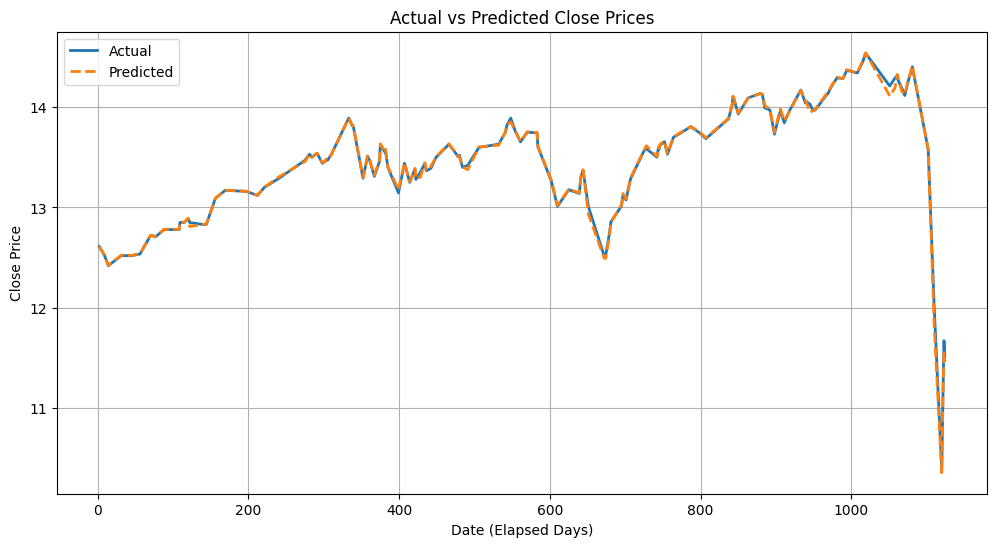

In [19]:
import matplotlib.pyplot as plt

# To use Date for plotting, retrieve it from the original dataset corresponding to the test indices
test_indices = X_test.index
dates_for_test = df.loc[test_indices, 'ElapsedDays']  # Using ElapsedDays as a proxy for Date

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Date': dates_for_test,
    'Actual': y_test.values,
    'Predicted': y_pred_cv
}).sort_values(by='Date')  # Sort by Date for proper plotting

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', linewidth=2)
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date (Elapsed Days)')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
lasso_cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 10,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

## Step-6: Hyperparameter Tunning

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha' : [0.01, 0.1, 1.0, 10.0],
    'fit_intercept' : [True,False],
    'precompute' : [True,False],
    'random_state' : [24,42],
    'selection' : ['cyclic','random'],
    'tol' : [0.01,0.001,0.0001,0.00001],
    'warm_start' : [True,False],
}

In [22]:
lasso_2 = Lasso(max_iter=5000)
grid_search = GridSearchCV(
    estimator=lasso_2,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Change scoring metric if needed
    cv=5,
    n_jobs=-1  # Use all available processors
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'alpha': 0.01, 'fit_intercept': True, 'precompute': True, 'random_state': 24, 'selection': 'random', 'tol': 1e-05, 'warm_start': True}
Best score: -0.0008077716784629802


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid_2 = {
    'alpha' : [0.01, 0.009,0.008,0.02,0.015],
    'fit_intercept' : [True],
    'precompute' : [True],
    'random_state' : [24],
    'selection' : ['random'],
    'tol' : [1e-05],
    'warm_start' : [True]
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_3 = Lasso(max_iter=5000)
grid_search_2 = GridSearchCV(
    estimator=lasso_3,
    param_grid=param_grid_2,
    scoring='neg_mean_squared_error',  # Change scoring metric if needed
    cv=5,
    n_jobs=-1  # Use all available processors
)

# Fit the model
grid_search_2.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters:", grid_search_2.best_params_)
print("Best score:", grid_search_2.best_score_)

Best parameters: {'alpha': 0.008, 'fit_intercept': True, 'precompute': True, 'random_state': 24, 'selection': 'random', 'tol': 1e-05, 'warm_start': True}
Best score: -0.0007657762713532967


## Step-7: Model retraining with best parameters

In [24]:
from sklearn.linear_model import LassoCV

lasso_final = Lasso(alpha= 0.008,fit_intercept= True,precompute= True,random_state= 24,selection= 'random',tol= 1e-05,warm_start = True)

lasso_final.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_final = lasso_cv.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# Results
print("Mean Squared Error:", mse)
print("Lasso Coefficients:", lasso_final.coef_)

# Optional: Display feature importance
features = X.columns
for feature, coef in zip(features, lasso_final.coef_):
    print(f"{feature}: {coef}")

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_final)
score

Mean Squared Error: 0.01133386173093336
Lasso Coefficients: [ 0.          0.11855304  0.45113555  0.          0.         -0.
  0.         -0.         -0.          0.        ]
Open: 0.0
High: 0.11855304064145859
Low: 0.45113555106072006
Volume: 0.0
Year: 0.0
Month_sin: -0.0
Month_cos: 0.0
DayOfWeek_sin: -0.0
DayOfWeek_cos: -0.0
ElapsedDays: 0.0


0.9983214830318784

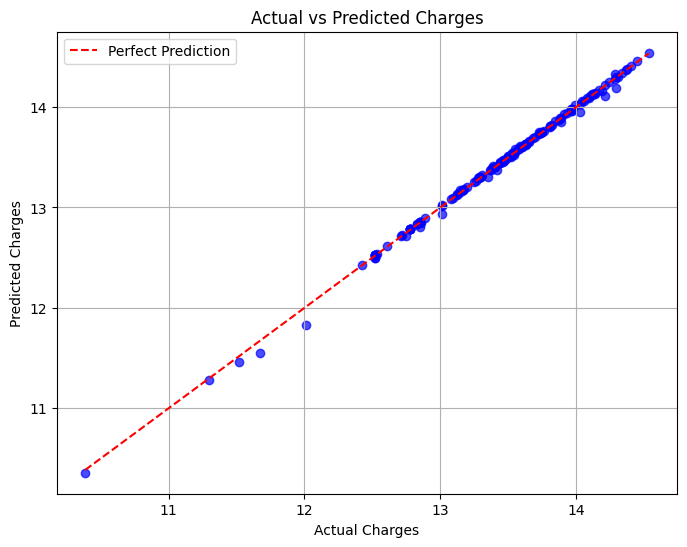

In [25]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid(True)
plt.show()

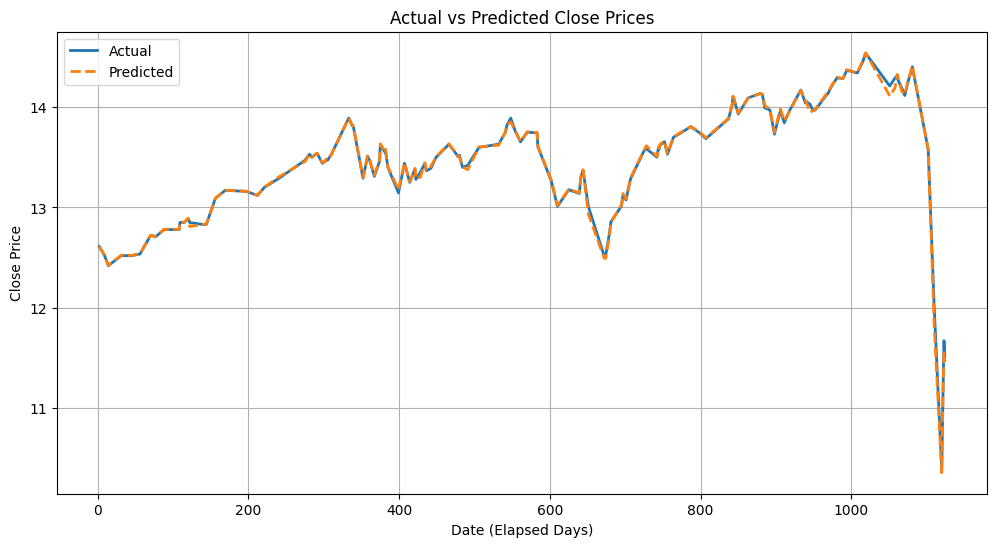

In [26]:
import matplotlib.pyplot as plt

# To use Date for plotting, retrieve it from the original dataset corresponding to the test indices
test_indices = X_test.index
dates_for_test = df.loc[test_indices, 'ElapsedDays']  # Using ElapsedDays as a proxy for Date

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Date': dates_for_test,
    'Actual': y_test.values,
    'Predicted': y_pred_final
}).sort_values(by='Date')  # Sort by Date for proper plotting

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', linewidth=2)
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date (Elapsed Days)')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()